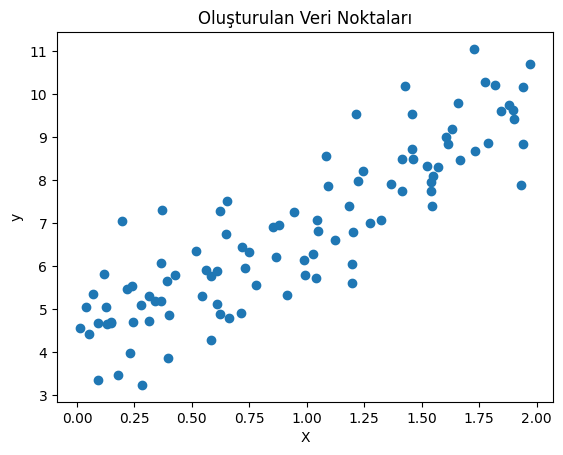

Eğim (slope): 3.046017275467842
Kesişim (intercept): 3.9026149817277886


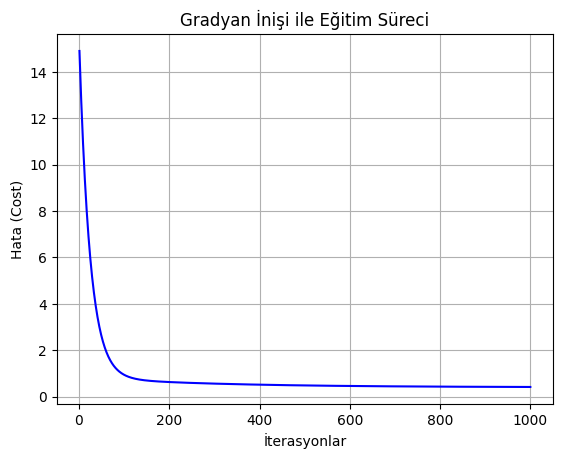

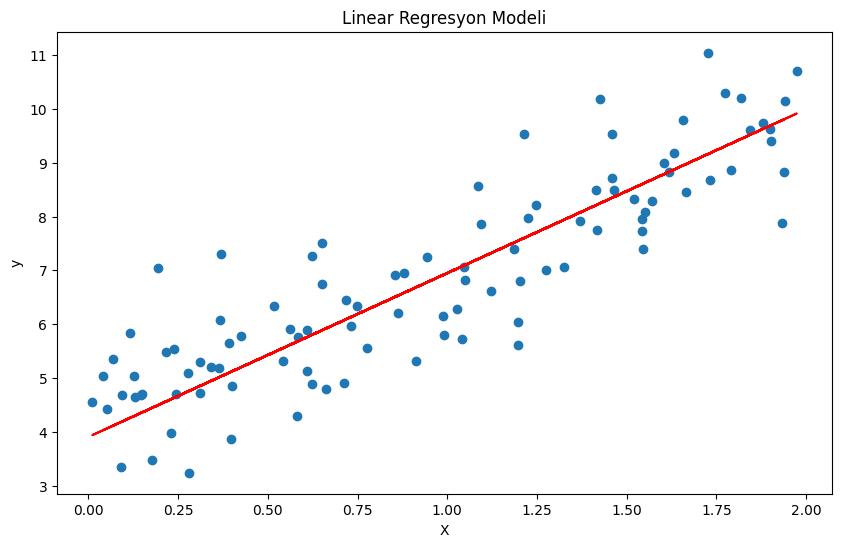

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Veri oluşturma
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Veriyi görselleştirme
plt.scatter(X, y)
plt.title('Oluşturulan Veri Noktaları')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Linear regresyon modeli için hata fonksiyonu
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradyan inişi
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (1/m) * learning_rate * (X.T.dot(errors))
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Veri setini düzenleme
X_b = np.c_[np.ones((100, 1)), X]  # Bias terimini eklemek için
theta = np.random.randn(2, 1)  # Başlangıçta rastgele theta değerleri

# Gradyan inişi ile eğitim
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Eğitim sonrası modelin parametreleri
print('Eğim (slope):', theta[1][0])
print('Kesişim (intercept):', theta[0][0])

# Eğitim sürecini görselleştirme
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('İterasyonlar')
plt.ylabel('Hata (Cost)')
plt.title('Gradyan İnişi ile Eğitim Süreci')
plt.show()

# Veriyi ve modeli görselleştirme
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.title('Linear Regresyon Modeli')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


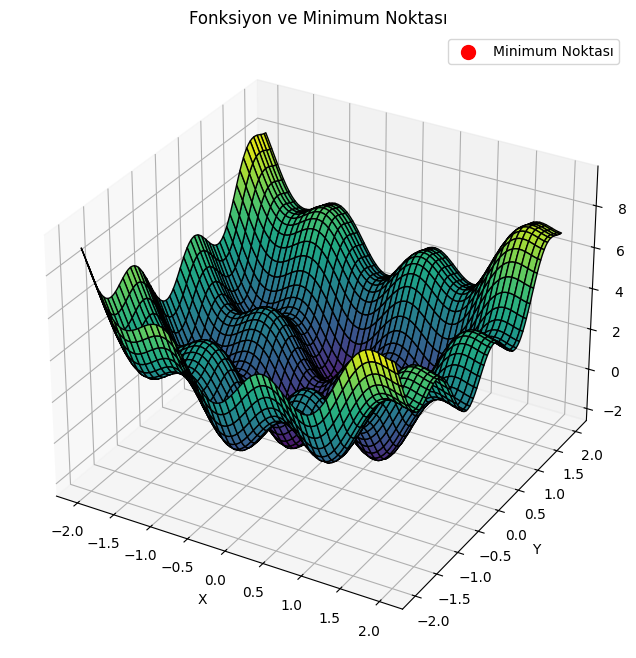

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonksiyonumuz
def func(x, y):
    return x**2 + y**2 + np.sin(5*x) + np.sin(5*y)

# Veri noktalarını oluşturma
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = func(x, y)

# 3D grafik oluşturma
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k')

# Grafik üzerine minimum noktalarını ekleyelim
min_points = np.array([[0, 0, func(0, 0)]])
ax.scatter(min_points[:, 0], min_points[:, 1], min_points[:, 2], color='red', s=100, marker='o', label='Minimum Noktası')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Fonksiyon ve Minimum Noktası')
ax.legend()

plt.show()
